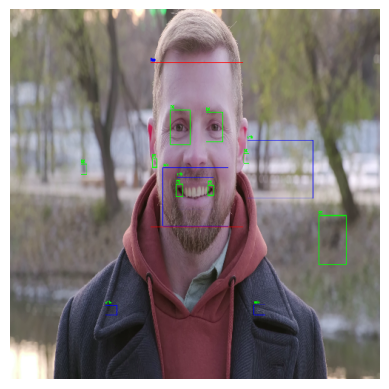

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

face_cascades =   cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
smile_cascades =  cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_smile.xml')
eye_cascades =    cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml' )

video =  cv.VideoCapture("C:/Users/ragha/Downloads/3249935-uhd_3840_2160_25fps.mp4")

while True:
    ret , frame =  video.read()
    if not ret :
        break
    grey =  cv.cvtColor(frame , cv.COLOR_BGR2GRAY)
    faces = face_cascades.detectMultiScale(grey , 1.1 ,6 )
    smile =  smile_cascades.detectMultiScale(grey , 1.8 , 25)
    eye = eye_cascades.detectMultiScale(grey , 1.1 , 8)
    #frame = cv.resize(frame  , (1000,1000))
    for (x , y, w, h) in faces:
        cv.putText(frame, "Face", (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 5, cv.LINE_AA)
        cv.rectangle(frame , (x ,y) , (x+w , y+h) , (0,0,255) , 2)
    for (x , y, w, h) in smile:
        cv.putText(frame, "smile", (x, y - 10), cv.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2, cv.LINE_AA)
        cv.rectangle(frame , (x ,y) , (x+w , y+h) , (255,0,0) , 2)    
    for (x,y,w,h) in eye:
        cv.putText(frame , "EYE" , (x, y-10) , cv.FONT_HERSHEY_SIMPLEX, 0.7 , (0,255,0), 3 , cv.LINE_AA)
        cv.rectangle(frame , (x,y) , (x+w , y+h) , (0,255,0) , 3)
    frame = cv.resize(frame , (500,500))
    cv.imshow("Face Recognition" , frame)
    frame = cv.cvtColor(frame , cv.COLOR_BGR2RGB)
    plt.imshow(frame)
    plt.axis("OFF")
    if cv.waitKey(25) & 0xFF ==  ord('q'):
        break

video.release()
cv.destroyAllWindows()